<a href="https://colab.research.google.com/github/Gamearonx/Simple-Multiple-Linear-Regression/blob/main/SIMPLE_LINEAR_AND_MULTIPLE_LINEAR_REGRESSION_Startup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
df = pd.read_csv("/content/drive/My Drive/EDA Assignment Files/Assignments/50_Startups.csv").dropna()

In [30]:
df = pd.get_dummies(df, drop_first=True)  # Encode categorical variables


In [31]:
# Step 2: Split data
X = df.drop(columns=['Profit'])
y = df['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Step 3: Simple Linear Regression (using 'R&D Spend' as predictor)
X_simple_train = X_train[['R&D Spend']]
X_simple_test = X_test[['R&D Spend']]
model_simple = LinearRegression().fit(X_simple_train, y_train)
y_pred_simple = model_simple.predict(X_simple_test)


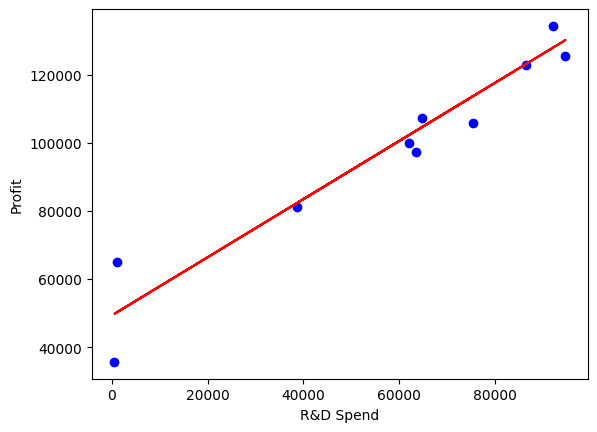

In [33]:
# Step 4: Plot Simple Linear Regression
plt.scatter(X_simple_test, y_test, color='blue')
plt.plot(X_simple_test, y_pred_simple, color='red')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

In [34]:
# Step 5: Multiple Linear Regression
model_multi = LinearRegression().fit(X_train, y_train)
y_pred_multi = model_multi.predict(X_test)

In [36]:
# Step 6: Evaluation Function
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

In [37]:
# Step 7: Print Evaluation Metrics
print("Simple Linear Regression:", evaluate(y_test, y_pred_simple))
print("Multiple Linear Regression:", evaluate(y_test, y_pred_multi))

Simple Linear Regression: (59510962.80787997, 0.9265108109341951)
Multiple Linear Regression: (82010363.04430099, 0.8987266414328637)


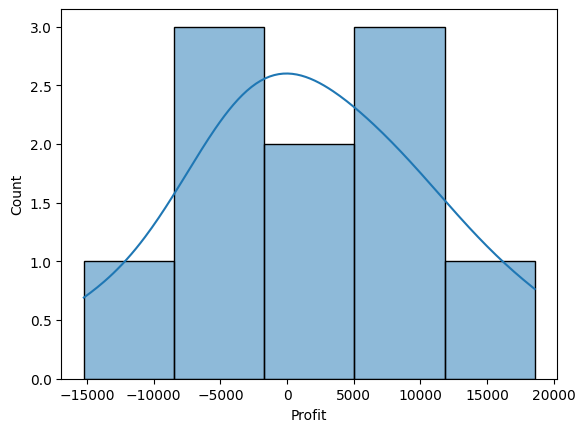

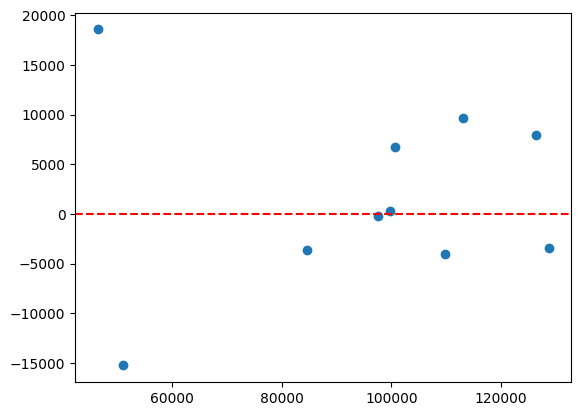

In [38]:
# Step 8: Residual Analysis
residuals = y_test - y_pred_multi
sns.histplot(residuals, kde=True)
plt.show()

plt.scatter(y_pred_multi, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [39]:
# Step 9: Model Optimization - Remove highly correlated features
corr_matrix = X.corr()
high_corr_features = [column for column in corr_matrix.columns if any(abs(corr_matrix[column]) > 0.8)]
X_optimized = X.drop(columns=high_corr_features, errors='ignore')

# Ensure X_optimized is not empty
if X_optimized.shape[1] == 0:
    print("Warning: All features were removed. Reverting to original features.")
    X_optimized = X  # Use original features if all were removed

In [40]:
# Step 10: Train optimized model
X_train_opt, X_test_opt, _, _ = train_test_split(X_optimized, y, test_size=0.2, random_state=42)
model_optimized = LinearRegression().fit(X_train_opt, y_train)
y_pred_opt = model_optimized.predict(X_test_opt)

In [41]:
# Step 11: Evaluate optimized model
print("Optimized Model:", evaluate(y_test, y_pred_opt))

Optimized Model: (82010363.04430099, 0.8987266414328637)
